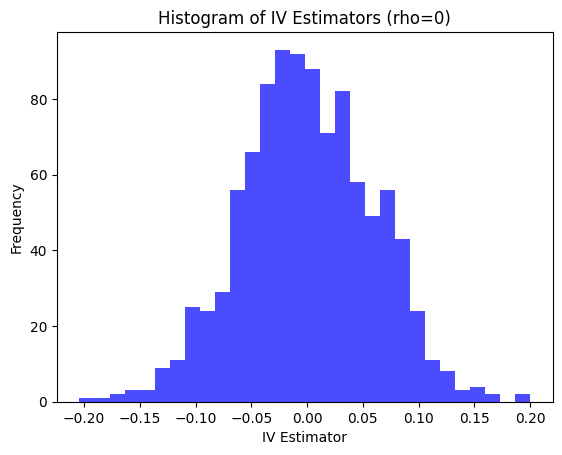

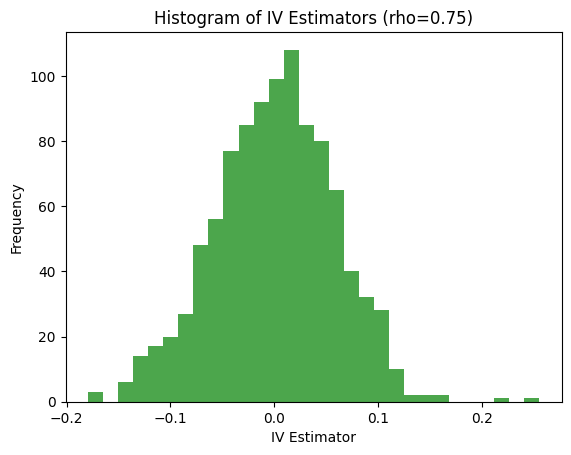

Summary of Findings:
(a) Mean IV Estimator (rho=0): 0.000621402590066845
(a) Variance of IV Estimator (rho=0): 0.003517173848829195
(b) Mean IV Estimator (rho=0.75): 0.0008177865104985425
(b) Variance of IV Estimator (rho=0.75): 0.003361871462793786


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate samples for the IV estimator
def generate_samples(n, mu, alpha, beta, sigma1, gamma, rho):
    # Generate U3 samples
    u3 = np.random.normal(mu[0], sigma1, n)
    
    # Generate D_t samples
    z = np.random.binomial(1, 0.5, n)
    u3_condition = z * gamma
    d_t = (u3 <= u3_condition).astype(int)
    
    # Generate Y_t samples
    y_t = alpha + d_t * (np.random.normal(mu[1], 1, n) + beta * np.random.normal(mu[2], 1, n))
    
    return y_t, d_t

# Function to calculate the IV estimator
def iv_estimator(y_t, d_t, gamma):
    d_t_1 = (d_t == 1)
    d_t_0 = (d_t == 0)
    
    y_t_1 = y_t[d_t_1]
    y_t_0 = y_t[d_t_0]
    
    iv_estimate = np.mean(y_t_1) - np.mean(y_t_0)
    
    return iv_estimate

# Parameters
mu = np.array([0, 0, 0])
alpha = 0.2
beta = 0
sigma1 = 2
gamma = 0.75
n = 500
S = 1000

# (a) Monte Carlo experiment with rho = 0
rho = 0
iv_estimates_a = []

for _ in range(S):
    y_t, d_t = generate_samples(n, mu, alpha, beta, sigma1, gamma, rho)
    iv_estimate = iv_estimator(y_t, d_t, gamma)
    iv_estimates_a.append(iv_estimate)

# Calculate mean and variance
mean_iv_a = np.mean(iv_estimates_a)
var_iv_a = np.var(iv_estimates_a)

# Plot histogram
plt.hist(iv_estimates_a, bins=30, color='blue', alpha=0.7)
plt.xlabel('IV Estimator')
plt.ylabel('Frequency')
plt.title('Histogram of IV Estimators (rho=0)')
plt.savefig('/Users/veronica/Dropbox/Apps/Overleaf/EC_708_vcperez/figures/pset_1_iv_estimates_rho_0.png')
plt.show()

# (b) Monte Carlo experiment with rho = 0.75
rho = 0.75
iv_estimates_b = []

for _ in range(S):
    y_t, d_t = generate_samples(n, mu, alpha, beta, sigma1, gamma, rho)
    iv_estimate = iv_estimator(y_t, d_t, gamma)
    iv_estimates_b.append(iv_estimate)

# Calculate mean and variance
mean_iv_b = np.mean(iv_estimates_b)
var_iv_b = np.var(iv_estimates_b)

# Plot histogram
plt.hist(iv_estimates_b, bins=30, color='green', alpha=0.7)
plt.xlabel('IV Estimator')
plt.ylabel('Frequency')
plt.title('Histogram of IV Estimators (rho=0.75)')
plt.savefig('/Users/veronica/Dropbox/Apps/Overleaf/EC_708_vcperez/figures/pset_1_iv_estimates_rho_075.png')
plt.show()

# (c) Summarize findings
print("Summary of Findings:")
print("(a) Mean IV Estimator (rho=0):", mean_iv_a)
print("(a) Variance of IV Estimator (rho=0):", var_iv_a)
print("(b) Mean IV Estimator (rho=0.75):", mean_iv_b)
print("(b) Variance of IV Estimator (rho=0.75):", var_iv_b)
